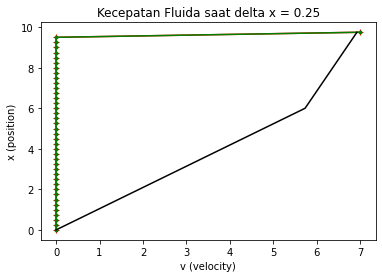


kesalahan relatif = 4.005113636363637
Waktu yang dibutuhkan dalam proses running = 0.31558376999999993 detik


In [8]:
#Mengimport Library
import numpy as np
import matplotlib.pyplot as plt
import time

#Membuat Variabel
mua=1
mum=3
dx=0.25
dt=0.5*dx 
k=6;
t = list()
z=0
start = time.process_time()


while z<50:
    t.append(z)
    z+=dt

x = list()
z=0
while z<10:
    x.append(z)
    z+=dx

xA = list()
z=0
while z<6:
    xA.append(z)
    z+=dx

nxA=len(xA)

xM = list()
z=0
while z<10:
    xM.append(z)
    z+=dx
    
nxM=len(xM)
n=len(x)


v=np.zeros(n)
for j in range(0,n):
    if x[j]<=k:
        v[j]=(7*mum*x[j])/(6*mum+4*mua)
    else:
        v[j]=((7*mua*x[j])/(6*mum+4*mua))+((21*mum-21*mua)/(3*mum+2*mua))

V=np.zeros(n)
g=1/dt;
for i in range(1,len(t)):
    V0=V
    V0[n-1]=7
    
    b=mua/(dx**2)
    c=(2*mua/(dx**2))+g
    d=mum/(dx**2)
    e=(2*mum/(dx**2))+g
    f=((2*mua+2*mum)/(dx**2))+(2*g)
    dimin=np.ones(nxA-1)
    diminb=np.ones(nxA-2)
    di=np.ones(1)
    diplus=np.ones(nxM-1)
    diplusb=np.ones(nxM-2)
    j =0
    while j<6:
        
        q3=b*diminb
        w3=-c*dimin
        r3=b*dimin
        k1=-g*V0[range(1,nxA-1)]
        j+=dx

    
    q2=2*b*di
    w2=-f*di
    r2=2*d*di
    k2=-g*V0[nxA]-g*V0[nxA]

    while j<10:
        q1=d*diplus
        w1=-e*diplus
        r1=d*diplusb
        k3=-g*V0[range(nxA+1,n-1)]
        j+=dx

    q=[q3,q2,q1]
    w=[w3,w2,w1]
    r=[r3,r2,r1]
    k=[k1,k2,k3]
    A=q+w+r
    
    V[1]=0
    V[n-1]=7
    if t[i]==1:
        V05=V;
    elif t[i]==5:
        V5=V;
    elif t[i]==50:
        V50=V

#Mencetak Grafik
plt.plot(V05,x,'r+-', V5,x,'g.-', v,x,'k-')

plt.title('Kecepatan Fluida saat delta x = 0.25')
plt.xlabel('v (velocity)')
plt.ylabel('x (position)')
plt.show()

#Kesalahan Relatif
error=sum(abs(V-v))/n
print('\nkesalahan relatif =', error)

#Mencetak waktu
print("Waktu yang dibutuhkan dalam proses running =", time.process_time()-start, 'detik')